# Number Predictor - Emerging Technologies 2019
# Name: Tomas Brazas ID: G00349242

## Research

This model was created for Emerging Technologies project that has to be applied to a web application where the user draws a digit on a canvas. A prediction of what the user has drawn will be returned as a string. The database being used is: MNIST database. To build using Keras which is available with Anaconda.


# Neural Networks

Since the project is based on a neural network. I researched about neaural networks and how they operate.  Neural networks are made of neurons. A neuron is "a specialized cell transmitting nerve impulses; a nerve cell." - Oxford Dictionary. It has an input and an output.



![](neuralnetwork.jpeg)


##  Imports

In [31]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import keras as kr

## Loading and Decompressing the data

In [32]:
# Importing the the mnist data
(train_img, train_lbl), (test_img, test_lbl) = kr.datasets.mnist.load_data()

# Reshaping the data using normalisation
train_img = train_img.reshape(60000, 784)
test_img = test_img.reshape(10000, 784)

# Converting the images to float32 to divide
train_img = train_img.astype('float32')
test_img = test_img.astype('float32')

# Dividing the images by 255 to scale the range to [0,1]
train_img = train_img/255
test_img = test_img/255 
digits= 10

train_lbl = kr.utils.np_utils.to_categorical(train_lbl, digits)
test_lbl = kr.utils.np_utils.to_categorical(test_lbl, digits)

print("One hot vector at index 5 of training labels ", train_lbl[5])

One hot vector at index 5 of training labels  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Displaying the images 

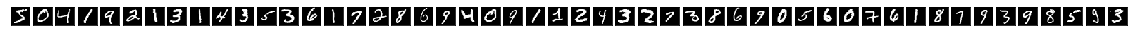

In [33]:
# Plotting examples
plt.figure(1, figsize=(20,10))

# For loop displays first 50 images
for i in range(50):
    plt.subplot(1,50,i+1)
    
    # Shows image
    plt.imshow(train_img[i].reshape(28,28), cmap='gray', interpolation='nearest')
    
    # Remove label markings
    plt.xticks([])
    plt.yticks([])

## Creating the Neural Network

In [34]:
# Creating the neural network by using the models import from keras
print("Creating model")
model = kr.models.Sequential()

print("Sequential model created")
print("Adding layers to model...")

# Creating the layers of the netwrok using the Dense call from the layers import
# 392 neurons in each of the first two layers to add up to 782 which the total amount of pixels in the passed image
# relu(Retified Linear Units) gives an output the same as the input if the input is greater than 0 and outputs 0 if the input is 0 or less
# relu is chosen here instead of sigmoid because it builds the model faster
model.add(kr.layers.Dense(392, activation='relu', input_shape=(784,))) # Use input_shape=(28,28) for unflattened data.
model.add(kr.layers.Dense(392, activation='relu'))

# Dropout layer stops overfitting of model
model.add(kr.layers.Dropout(0.2))

# 10 nuerons in the final layer to coincide with the 10 digits in the MNIST dataset
# softmax maps output to a [0,1] range, it is for probability distribution
model.add(kr.layers.Dense(10, activation='softmax'))

print("Layers added to model")

Creating model
Sequential model created
Adding layers to model...
Layers added to model


In [35]:
# Prints out a string summary of the model
print("Summarizing model...")
print("Model Summary")
model.summary()

Summarizing model...
Model Summary
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_8 (Dense)              (None, 392)               154056    
_________________________________________________________________
dropout_3 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compiles and completes the model
print("Compiling model...")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model compiled")

Compiling model...
Model compiled


## Training the Model

In [37]:
# Batch size is number of samples that will be testsed
# Epochs is the amount of times the test is repeated
history = model.fit(train_img, train_lbl, batch_size=50, epochs=5, verbose=1, validation_data=(test_img, test_lbl))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 245us/step - loss: 0.2030 - accuracy: 0.9382 - val_loss: 0.1017 - val_accuracy: 0.9701
Epoch 2/5
60000/60000 [==============================] - 15s 254us/step - loss: 0.0834 - accuracy: 0.9740 - val_loss: 0.0813 - val_accuracy: 0.9754
Epoch 3/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0578 - accuracy: 0.9819 - val_loss: 0.0701 - val_accuracy: 0.9769
Epoch 4/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.0419 - accuracy: 0.9862 - val_loss: 0.0863 - val_accuracy: 0.9760
Epoch 5/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.0362 - accuracy: 0.9882 - val_loss: 0.0681 - val_accuracy: 0.9804


## Efficiency 

In [38]:
# Evaluates and displays the loss and accuracy of the model
score = model.evaluate(train_img, train_lbl, verbose=0)
print('Test cross-entropy loss: %0.9f' % score[0])
print('Test accuracy: %0.9f' % score[1])

Test cross-entropy loss: 0.021788535
Test accuracy: 0.993133307


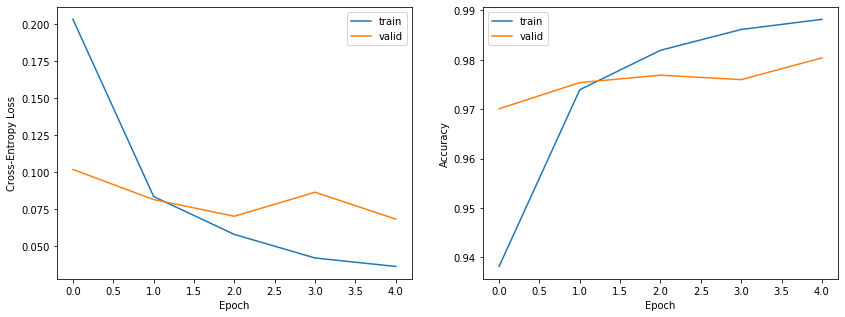

In [39]:
#Plotting the loss trajectory
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Saving The Model

In [40]:
print("Saving Model......")
model.save('model.h5')
print("Model Saved.")

Saving Model......
Model Saved.


## Loading an instance of the newly saved Model

In [41]:
#Loading the saved Model
print("Loading Model......")
loadedModel = kr.models.load_model('model.h5')
print("Model loaded.")

Loading Model......
Model loaded.


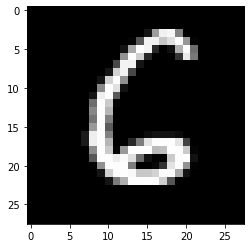

('Predicted digit: ', 6)

In [42]:
# Plots the image that will be passed for prediction
plt.imshow(test_img[98].reshape(28, 28), cmap="gray")
plt.show()

"Predicted digit: ", np.argmax(loadedModel.predict(test_img[98:99]))

## References

https://www.tensorflow.org/tutorials/keras/classification <br>
https://nextjournal.com/gkoehler/digit-recognition-with-keras <br>
https://machinelearningmastery.com/keras-functional-api-deep-learning/ <br>
https://arrow.dit.ie/cgi/viewcontent.cgi?article=1190&context=scschcomdis <br>
https://web.microsoftstream.com/video/8e965392-ccc2-4faa-a755-8d86de6a91d6?referrer=https:%2F%2Flearnonline.gmit.ie%2Fcourse%2Fview.php%3Fid%3D135 <br>
https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb <br>
https://www.ics.uci.edu/~mohamadt/keras_mnist.html <br>